Import Libraries
--

In [44]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

Import Dataset
--

In [6]:
codsoft_4 = pd.read_csv("E:\\MSC Python\\advertising.csv")
codsoft_4

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [7]:
codsoft_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [8]:
codsoft_4.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


Finding Missing Values
--

In [14]:
missing_values = codsoft_4.isnull().sum()
missing_values

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

Visualization
-

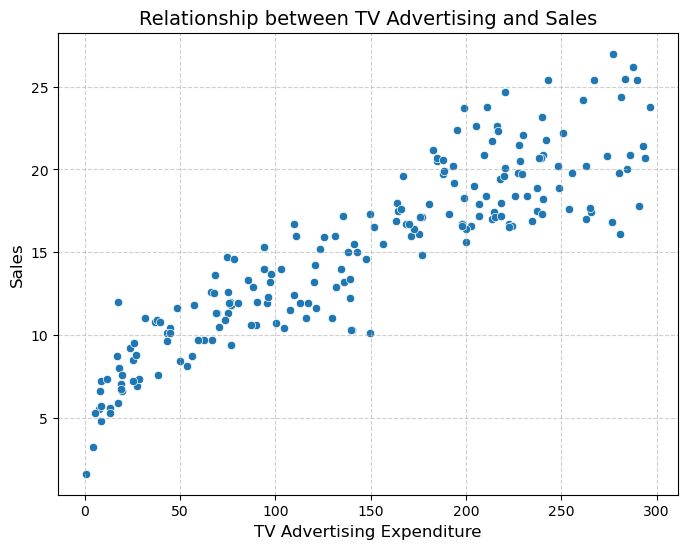

In [17]:
# Scatter plot between 'TV' and 'Sales'
plt.figure(figsize=(8, 6))
sns.scatterplot(x=codsoft_4['TV'], y=codsoft_4['Sales'])
plt.title('Relationship between TV Advertising and Sales', fontsize=14)
plt.xlabel('TV Advertising Expenditure', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.grid(visible=True, linestyle='--', alpha=0.6)
plt.show()

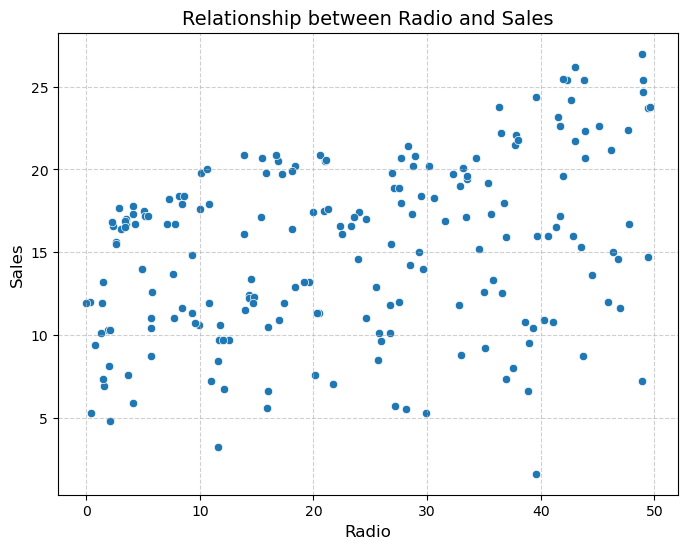

In [19]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=codsoft_4['Radio'], y=codsoft_4['Sales'])
plt.title('Relationship between Radio and Sales', fontsize=14)
plt.xlabel('Radio', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.grid(visible=True, linestyle='--', alpha=0.6)
plt.show()

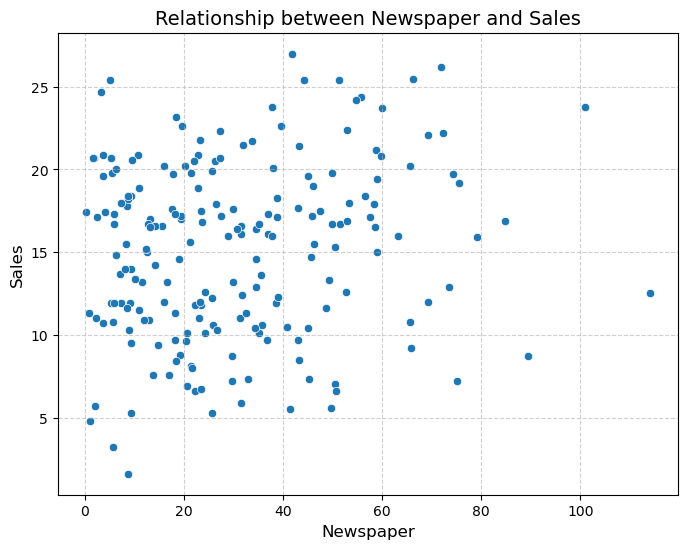

In [21]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=codsoft_4['Newspaper'], y=codsoft_4['Sales'])
plt.title('Relationship between Newspaper and Sales', fontsize=14)
plt.xlabel('Newspaper', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.grid(visible=True, linestyle='--', alpha=0.6)
plt.show()

Correlation Heatmap
-

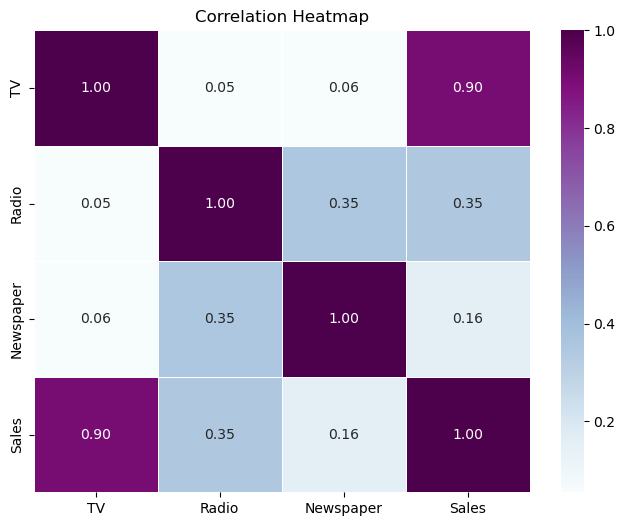

In [66]:
# Compute the correlation matrix
correlation_matrix = codsoft_4.corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='BuPu', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [24]:
# Split data into features (X) and target (y)
X = codsoft_4[['TV', 'Radio', 'Newspaper']]
y = codsoft_4['Sales']

In [30]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [36]:
# Predict sales on the test set
y_pred = model.predict(X_test)
y_pred

array([17.0347724 , 20.40974033, 23.72398873,  9.27278518, 21.68271879,
       12.56940161, 21.08119452,  8.69035045, 17.23701254, 16.66657475,
        8.92396497,  8.4817344 , 18.2075123 ,  8.06750728, 12.64550975,
       14.93162809,  8.12814594, 17.89876565, 11.00880637, 20.47832788,
       20.80631846, 12.59883297, 10.9051829 , 22.38854775,  9.41796094,
        7.92506736, 20.83908497, 13.81520938, 10.77080925,  7.92682509,
       15.95947357, 10.63490851, 20.80292008, 10.43434164, 21.5784752 ,
       21.18364487, 12.12821771, 22.80953262, 12.60992766,  6.46441252])

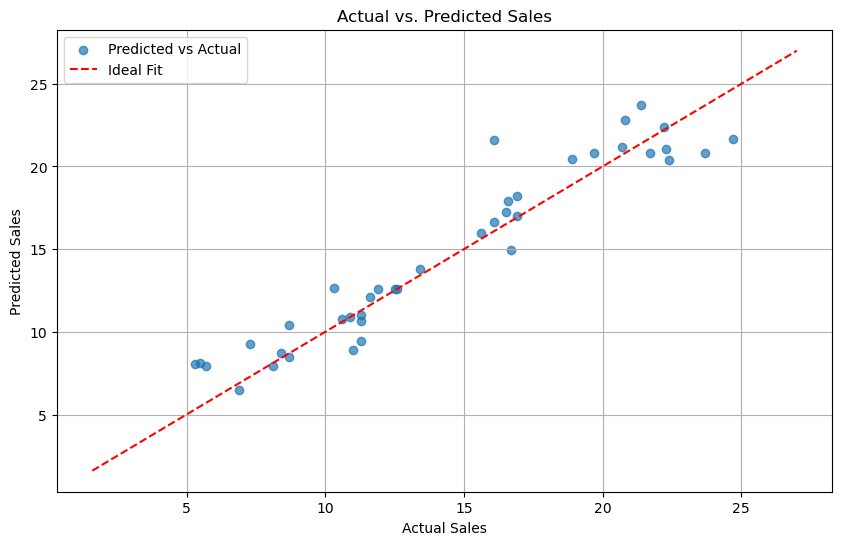

In [52]:
# Plot actual vs. predicted sales
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, label='Predicted vs Actual')
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--r', label='Ideal Fit')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs. Predicted Sales')
plt.legend()
plt.grid(True)
plt.show()

In [46]:
# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)  # Mean Squared Error
mae = mean_absolute_error(y_test, y_pred)  # Mean Absolute Error
rmse = mse ** 0.5  # Root Mean Squared Error
r2 = r2_score(y_test, y_pred)  # R-squared Score

# Print the metrics
print("Performance Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R²): {r2:.2f}")

Performance Metrics:
Mean Absolute Error (MAE): 1.27
Mean Squared Error (MSE): 2.91
Root Mean Squared Error (RMSE): 1.71
R-squared (R²): 0.91
